<a href="https://colab.research.google.com/github/ayanmmm/Task_5/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
users = pd.read_csv('/content/sample_data/takehome_users.csv', parse_dates = ['creation_time'], encoding = "unicode_escape")
users.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [93]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [94]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [95]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'] ,unit='s')
users.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0


In [96]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


###CSV 2

In [97]:
user_eng = pd.read_csv('/content/sample_data/takehome_user_engagement.csv',  parse_dates = ['time_stamp'], encoding = "unicode_escape")
user_eng.head(2)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1


In [98]:
user_eng.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [99]:
###Finfinds

For determining which users can be labeled as adopted users, we can use groupby and rolling methods to find the users who were active for more than 3 days in any of the 7 day rolling period.

In [100]:
u1 = users['last_session_creation_time'].min(), users['last_session_creation_time'].max()
u2 = users['creation_time'].min(), users['creation_time'].max()
print(u1,'\n',u2)

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50')) 
 (Timestamp('2012-05-31 00:43:00'), Timestamp('2014-05-30 23:59:00'))


In [102]:
df = user_eng.copy()

In [103]:
df['date'] = pd.to_datetime(df.time_stamp.dt.date)

def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()

df['visits_7_days'] = df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')
df.describe()

,user_id,visited,visits_7_days
count,207917.000000,207917.0,207917.000000
mean,5913.314197,1.0,4.381393
std,3394.941674,0.0,2.042666
min,1.000000,1.0,1.000000
25%,3087.000000,1.0,3.000000
50%,5682.000000,1.0,4.000000
75%,8944.000000,1.0,6.000000
max,12000.000000,1.0,7.000000


In [104]:
df[df.visits_7_days >= 3.0]

,time_stamp,user_id,visited,date,visits_7_days
9,2014-02-09 03:45:04,2,1,2014-02-09,3.0
10,2014-02-13 03:45:04,2,1,2014-02-13,3.0
27,2013-02-19 22:08:03,10,1,2013-02-19,3.0
30,2013-03-02 22:08:03,10,1,2013-03-02,3.0
31,2013-03-05 22:08:03,10,1,2013-03-05,3.0
...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,2014-05-23,6.0
207899,2014-05-24 11:04:47,11988,1,2014-05-24,6.0
207900,2014-05-26 11:04:47,11988,1,2014-05-26,5.0
207901,2014-05-27 11:04:47,11988,1,2014-05-27,5.0


If any of the values in the _visits_7days column is >=3, then we can label that user as adopted.

In [105]:
user_adopted = df.groupby('user_id')['visits_7_days'].max().reset_index()

user_adopted['adopted_user'] = user_adopted['visits_7_days'].apply(lambda x: 1 if x>=3 else 0)

user_adopted.head()

,user_id,visits_7_days,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


In [106]:
user_adopted.adopted_user.value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [107]:
user_adopted.drop('visits_7_days', axis = 1, inplace = True)
user_adopted.rename(columns={"user_id": "object_id"}, inplace=True)
user_adopted.set_index("object_id", inplace = True)

In [108]:
user_adopted

,adopted_user
object_id,
1,0
2,1
3,0
4,0
5,0
...,...
11996,0
11997,0
11998,0


Joining the above _useradopted dataframe with the original users dataframe.

In [109]:
df_users = users.join(user_adopted, on = 'object_id', how='left')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [110]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                8823 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)


The null values in the _adopteduser and _last_session_creationtime can be filled in with 0 because we can assume that those users aren't adopted users.

In [111]:
df_users['last_session_creation_time'].fillna(0, inplace = True)
df_users['adopted_user'].fillna(0, inplace = True)
df_users.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145,0.133500
std,3464.24595,0.432742,0.356432,124.056723,3383.761968,0.340128
min,1.00000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000,0.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000,0.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000,0.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000,1.000000


Let's see if we can extract useful information from the email variable like it's domain.

In [112]:
df_users['email_domain'] = df_users.email.apply(lambda x: x.split('@')[1])
df_users['email_domain'].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: email_domain, Length: 1184, dtype: int64

Also checking the creation_source for NON NULL invited_by_user column

In [113]:
df_users[~df_users.invited_by_user_id.isnull()].creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE'], dtype=object)

**There are too many email domains and most of them seem fake domains so it's good to drop the column entirely. We can also drop the name and _objectid columns.**

**And for the _invited_by_userid let's convert the NULL values to 0 because the column has a Non Null value only if the _creationsource was a GUEST_INVITE or a ORG_INVITE anyways.**

**For the _creationtime column let's add a column which calculates how old the account is, i.e. the number of days since the account was created.**

**And since _last_session_creationtime can be removed as well because it was in a sense used to create the _adopteduser column.**

In [114]:
df_users.drop(['object_id', 'name', 'email', 'email_domain'], axis = 1, inplace = True)
df_users.invited_by_user_id.fillna(0, inplace=True)
df_users['days_since_creation'] = (user_eng.time_stamp.max() - df_users.creation_time).dt.days
df_users.drop(['creation_time', 'last_session_creation_time'], axis = 1, inplace = True)

Let's OneHotEncode the _creationsource column.

In [115]:
df_users = pd.get_dummies(df_users, columns=['creation_source'])
df_users.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_creation,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.249500,0.149333,141.884583,3188.691333,0.133500,324.568167,0.180250,0.354500,0.175917,0.173917,0.115417
std,0.432742,0.356432,124.056723,3869.027693,0.340128,216.646152,0.384412,0.478381,0.380765,0.379054,0.319537
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,0.000000,0.000000,129.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,108.000000,875.000000,0.000000,304.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,238.250000,6317.000000,0.000000,506.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,416.000000,11999.000000,1.000000,736.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
df_users.corr()['adopted_user']

opted_in_to_mailing_list              0.008097
enabled_for_marketing_drip            0.004653
org_id                                0.064523
invited_by_user_id                    0.021596
adopted_user                          1.000000
days_since_creation                   0.088020
creation_source_GUEST_INVITE          0.045408
creation_source_ORG_INVITE           -0.007636
creation_source_PERSONAL_PROJECTS    -0.075817
creation_source_SIGNUP                0.009299
creation_source_SIGNUP_GOOGLE_AUTH    0.036119
Name: adopted_user, dtype: float64

In [ ]:
#sns.pairplot(df_users, hue = 'adopted_user')

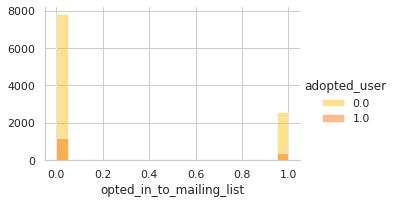

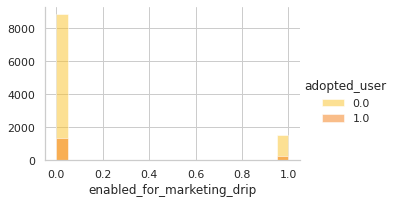

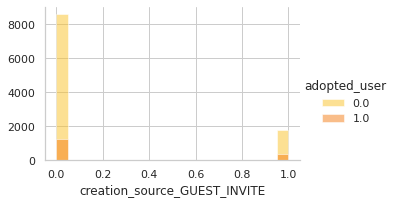

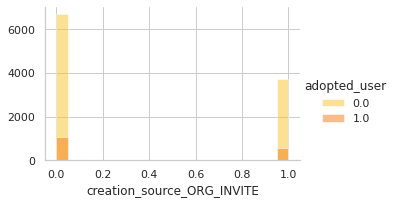

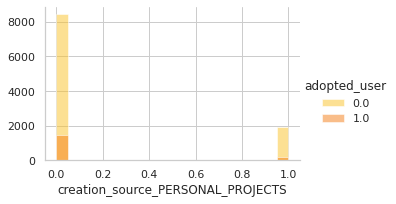

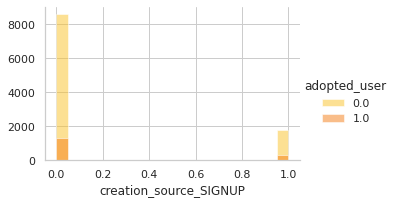

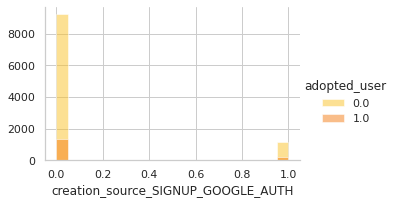

In [117]:
for col in ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source_GUEST_INVITE',
           'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
           'creation_source_SIGNUP_GOOGLE_AUTH']:
    g = sns.FacetGrid(df_users, hue = "adopted_user", height=3, aspect=1.5,)
    g.map(plt.hist, col, alpha=.5, bins = 20)
    g.add_legend()

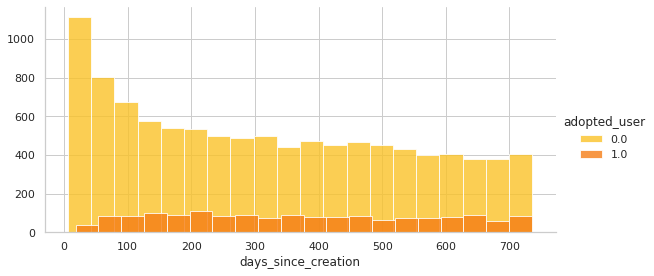

In [118]:
g = sns.FacetGrid(df_users, hue = "adopted_user", height=4, aspect=2,)
_ = g.map(plt.hist, 'days_since_creation', alpha=0.8, bins = 20)
_ = g.add_legend() 
#sns.distplot(df_users['days_since_creation'], kde = False, bins = 20, hue = 'adopted_user')

***We can see that the _adopteduser class is pretty unbalanced because only about 13% of the total 12000 users are adopted.***